In [1]:
import pandas as pd
import numpy as np
import pickle

from tqdm import tqdm

from LSTNet import LSTNet
from tools import Train, validation, GridSearch

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')

from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
with open('data/train_dataset.pickle', 'rb') as f:
    train_dataset = pickle.load(f)

with open('data/val_dataset.pickle', 'rb') as f:
    val_dataset = pickle.load(f)

with open('data/test_dataset.pickle', 'rb') as f:
    test_dataset = pickle.load(f)

In [4]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 사용법

+ `basic_params`: 딱히 건드릴 필요 없는 애들 (`n` 같은 것들)
+ `param_grid`: 그리드 서치의 대상이 되는 애들 (`m`: LSTM hidden size, `skip_hidden_size`: Skip GRU hidden size 등)
+ 기본적으로 Train과 사용법이 비슷함
    > `Train.best_model`: epoch들 중에서 loss가 가장 낮았던 순간을 기억  
    > `GridSearch.best_model`: parameter 조합들에 의한 여러 model들 중에서 loss가 가장 낮았던 것을 기억  
    > 아래 나오는 플롯들은 모두 최적의 parameter의 model에 대한 플롯

In [5]:
criterion = nn.MSELoss()
eval_metrics = [
    r2_score,
    mean_absolute_error
]

In [6]:
basic_params = {
    'P': 60,
    'm': 40,
    'dropout': 0.2,
    'output_func': 'sigmoid',
    'device': device
}

param_grid = {
    'hidR': [32, 40, 48],
    'hidC': [32, 40, 48],
    'hidS': [32, 40, 48],
    'Ck': [6, 10],
    'hw': [1, 2]
}

In [7]:
grid_model = GridSearch(criterion, eval_metrics, device, temp_save_path='checkpoints/model_by_param/temp_model.pt', masked=False)
best_model = grid_model.train_by_grid(
        LSTNet, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename='checkpoints/LSTNet_best.pt'
    )

Total 108 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 247.09it/s, Train Loss=0.8125, Valid Loss=0.4996, Valid R2=-0.1272, Valid MAE=0.5498]


Early Stopped
Setting   1 of Parameters Grid is now on progres.


Epoch 16: 100%|██████████| 2607/2607 [00:10<00:00, 250.60it/s, Train Loss=0.5004, Valid Loss=0.2073, Valid R2=0.5322, Valid MAE=0.3294]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:10<00:00, 244.10it/s, Train Loss=0.5701, Valid Loss=0.1603, Valid R2=0.6383, Valid MAE=0.3171]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [00:10<00:00, 249.72it/s, Train Loss=0.5064, Valid Loss=0.2400, Valid R2=0.4586, Valid MAE=0.3976]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [00:10<00:00, 239.55it/s, Train Loss=0.5428, Valid Loss=0.2391, Valid R2=0.4604, Valid MAE=0.3751]


Early Stopped
Setting   5 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [00:10<00:00, 242.42it/s, Train Loss=0.5336, Valid Loss=0.2073, Valid R2=0.5323, Valid MAE=0.3528]


Early Stopped
Setting   6 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:10<00:00, 243.06it/s, Train Loss=0.5183, Valid Loss=0.2597, Valid R2=0.4140, Valid MAE=0.3888]


Early Stopped
Setting   7 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:10<00:00, 242.54it/s, Train Loss=0.6735, Valid Loss=0.3698, Valid R2=0.1656, Valid MAE=0.4658]


Early Stopped
Setting   8 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 239.24it/s, Train Loss=0.6815, Valid Loss=0.3163, Valid R2=0.2863, Valid MAE=0.4706]


Early Stopped
Setting   9 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [00:10<00:00, 245.27it/s, Train Loss=0.4990, Valid Loss=0.1544, Valid R2=0.6517, Valid MAE=0.3096]


Early Stopped
Setting  10 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 245.60it/s, Train Loss=0.6926, Valid Loss=0.3039, Valid R2=0.3144, Valid MAE=0.4282]


Early Stopped
Setting  11 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [00:10<00:00, 241.24it/s, Train Loss=0.5600, Valid Loss=0.3585, Valid R2=0.1912, Valid MAE=0.4673]


Early Stopped
Setting  12 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [00:09<00:00, 262.60it/s, Train Loss=0.5544, Valid Loss=0.1561, Valid R2=0.6478, Valid MAE=0.2991]


Early Stopped
Setting  13 of Parameters Grid is now on progres.


Epoch 16: 100%|██████████| 2607/2607 [00:10<00:00, 251.19it/s, Train Loss=0.5479, Valid Loss=0.2310, Valid R2=0.4787, Valid MAE=0.3808]


Early Stopped
Setting  14 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 239.77it/s, Train Loss=0.7034, Valid Loss=0.3268, Valid R2=0.2626, Valid MAE=0.4527]


Early Stopped
Setting  15 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:09<00:00, 263.68it/s, Train Loss=0.5853, Valid Loss=0.2382, Valid R2=0.4625, Valid MAE=0.3757]


Early Stopped
Setting  16 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [00:10<00:00, 250.01it/s, Train Loss=0.5079, Valid Loss=0.1795, Valid R2=0.5950, Valid MAE=0.3551]


Early Stopped
Setting  17 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:11<00:00, 236.90it/s, Train Loss=0.7542, Valid Loss=0.3655, Valid R2=0.1754, Valid MAE=0.4394]


Early Stopped
Setting  18 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:10<00:00, 239.79it/s, Train Loss=0.5675, Valid Loss=0.7434, Valid R2=-0.6774, Valid MAE=0.6603]


Early Stopped
Setting  19 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [00:10<00:00, 240.94it/s, Train Loss=0.5212, Valid Loss=0.1005, Valid R2=0.7733, Valid MAE=0.2459]


Early Stopped
Setting  20 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:10<00:00, 243.18it/s, Train Loss=0.5439, Valid Loss=0.1874, Valid R2=0.5771, Valid MAE=0.3527]


Early Stopped
Setting  21 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [00:10<00:00, 240.21it/s, Train Loss=0.5545, Valid Loss=0.2099, Valid R2=0.5265, Valid MAE=0.3659]


Early Stopped
Setting  22 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:10<00:00, 246.69it/s, Train Loss=0.6503, Valid Loss=0.4179, Valid R2=0.0571, Valid MAE=0.5149]


Early Stopped
Setting  23 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [00:10<00:00, 243.10it/s, Train Loss=0.5167, Valid Loss=0.2672, Valid R2=0.3972, Valid MAE=0.3910]


Early Stopped
Setting  24 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [00:11<00:00, 228.90it/s, Train Loss=0.5312, Valid Loss=0.2938, Valid R2=0.3371, Valid MAE=0.4276]


Early Stopped
Setting  25 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [00:10<00:00, 249.76it/s, Train Loss=0.5624, Valid Loss=0.1789, Valid R2=0.5964, Valid MAE=0.3087]


Early Stopped
Setting  26 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [00:11<00:00, 232.53it/s, Train Loss=0.5738, Valid Loss=0.1910, Valid R2=0.5690, Valid MAE=0.3451]


Early Stopped
Setting  27 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:11<00:00, 234.64it/s, Train Loss=0.6640, Valid Loss=0.3431, Valid R2=0.2258, Valid MAE=0.4489]


Early Stopped
Setting  28 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:10<00:00, 238.99it/s, Train Loss=0.5877, Valid Loss=0.4180, Valid R2=0.0569, Valid MAE=0.4836]


Early Stopped
Setting  29 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:11<00:00, 234.66it/s, Train Loss=0.6383, Valid Loss=0.3930, Valid R2=0.1133, Valid MAE=0.5135]


Early Stopped
Setting  30 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 239.90it/s, Train Loss=0.6886, Valid Loss=0.5870, Valid R2=-0.3246, Valid MAE=0.6073]


Early Stopped
Setting  31 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:11<00:00, 232.89it/s, Train Loss=0.5815, Valid Loss=0.2389, Valid R2=0.4610, Valid MAE=0.4140]


Early Stopped
Setting  32 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:11<00:00, 232.40it/s, Train Loss=0.5200, Valid Loss=0.2163, Valid R2=0.5119, Valid MAE=0.3730]


Early Stopped
Setting  33 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [00:10<00:00, 238.94it/s, Train Loss=0.4996, Valid Loss=0.1468, Valid R2=0.6688, Valid MAE=0.2874]


Early Stopped
Setting  34 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:11<00:00, 232.04it/s, Train Loss=0.5218, Valid Loss=0.3622, Valid R2=0.1828, Valid MAE=0.4665]


Early Stopped
Setting  35 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [00:10<00:00, 238.81it/s, Train Loss=0.5204, Valid Loss=0.2319, Valid R2=0.4767, Valid MAE=0.3948]


Early Stopped
Setting  36 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:10<00:00, 239.58it/s, Train Loss=0.5986, Valid Loss=0.2130, Valid R2=0.5194, Valid MAE=0.3665]


Early Stopped
Setting  37 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [00:10<00:00, 241.87it/s, Train Loss=0.5471, Valid Loss=0.3221, Valid R2=0.2732, Valid MAE=0.4219]


Early Stopped
Setting  38 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [00:10<00:00, 251.24it/s, Train Loss=0.5662, Valid Loss=0.1728, Valid R2=0.6102, Valid MAE=0.3429]


Early Stopped
Setting  39 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 254.75it/s, Train Loss=0.8374, Valid Loss=0.3149, Valid R2=0.2894, Valid MAE=0.4336]


Early Stopped
Setting  40 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [00:10<00:00, 239.77it/s, Train Loss=0.6000, Valid Loss=0.1499, Valid R2=0.6619, Valid MAE=0.3125]


Early Stopped
Setting  41 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:10<00:00, 239.53it/s, Train Loss=0.5896, Valid Loss=0.2405, Valid R2=0.4573, Valid MAE=0.3920]


Early Stopped
Setting  42 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 247.26it/s, Train Loss=0.6685, Valid Loss=0.2466, Valid R2=0.4436, Valid MAE=0.3886]


Early Stopped
Setting  43 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:10<00:00, 246.46it/s, Train Loss=0.6575, Valid Loss=0.4309, Valid R2=0.0276, Valid MAE=0.5097]


Early Stopped
Setting  44 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:10<00:00, 240.08it/s, Train Loss=0.5864, Valid Loss=0.1663, Valid R2=0.6247, Valid MAE=0.3234]


Early Stopped
Setting  45 of Parameters Grid is now on progres.


Epoch 17: 100%|██████████| 2607/2607 [00:10<00:00, 248.63it/s, Train Loss=0.5030, Valid Loss=0.2065, Valid R2=0.5340, Valid MAE=0.3547]


Early Stopped
Setting  46 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 243.99it/s, Train Loss=0.6618, Valid Loss=0.1919, Valid R2=0.5671, Valid MAE=0.3521]


Early Stopped
Setting  47 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:10<00:00, 242.05it/s, Train Loss=0.6138, Valid Loss=0.3440, Valid R2=0.2238, Valid MAE=0.4793]


Early Stopped
Setting  48 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:10<00:00, 243.25it/s, Train Loss=0.5856, Valid Loss=0.3654, Valid R2=0.1754, Valid MAE=0.4846]


Early Stopped
Setting  49 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:10<00:00, 249.84it/s, Train Loss=0.6146, Valid Loss=0.2032, Valid R2=0.5414, Valid MAE=0.3536]


Early Stopped
Setting  50 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [00:10<00:00, 241.39it/s, Train Loss=0.5342, Valid Loss=0.1617, Valid R2=0.6351, Valid MAE=0.3027]


Early Stopped
Setting  51 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:10<00:00, 256.15it/s, Train Loss=0.5642, Valid Loss=0.3150, Valid R2=0.2892, Valid MAE=0.4391]


Early Stopped
Setting  52 of Parameters Grid is now on progres.


Epoch 15: 100%|██████████| 2607/2607 [00:10<00:00, 245.99it/s, Train Loss=0.5087, Valid Loss=0.3432, Valid R2=0.2256, Valid MAE=0.4667]


Early Stopped
Setting  53 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:10<00:00, 238.72it/s, Train Loss=0.6806, Valid Loss=0.4723, Valid R2=-0.0656, Valid MAE=0.5362]


Early Stopped
Setting  54 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:10<00:00, 243.18it/s, Train Loss=0.5688, Valid Loss=0.1444, Valid R2=0.6741, Valid MAE=0.3024]


Early Stopped
Setting  55 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 251.56it/s, Train Loss=0.6481, Valid Loss=0.6277, Valid R2=-0.4164, Valid MAE=0.6069]


Early Stopped
Setting  56 of Parameters Grid is now on progres.


Epoch 15: 100%|██████████| 2607/2607 [00:09<00:00, 264.18it/s, Train Loss=0.5017, Valid Loss=0.4163, Valid R2=0.0607, Valid MAE=0.5213]


Early Stopped
Setting  57 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [00:10<00:00, 242.22it/s, Train Loss=0.6185, Valid Loss=0.3100, Valid R2=0.3004, Valid MAE=0.4591]


Early Stopped
Setting  58 of Parameters Grid is now on progres.


Epoch 18: 100%|██████████| 2607/2607 [00:10<00:00, 241.36it/s, Train Loss=0.3563, Valid Loss=0.1277, Valid R2=0.7119, Valid MAE=0.2802]


Early Stopped
Setting  59 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:10<00:00, 246.15it/s, Train Loss=0.5851, Valid Loss=0.4333, Valid R2=0.0223, Valid MAE=0.5074]


Early Stopped
Setting  60 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [00:11<00:00, 232.09it/s, Train Loss=0.5340, Valid Loss=0.3660, Valid R2=0.1741, Valid MAE=0.4332]


Early Stopped
Setting  61 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:11<00:00, 227.65it/s, Train Loss=0.6450, Valid Loss=0.1901, Valid R2=0.5711, Valid MAE=0.3584]


Early Stopped
Setting  62 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:11<00:00, 237.00it/s, Train Loss=0.7238, Valid Loss=0.4152, Valid R2=0.0631, Valid MAE=0.5103]


Early Stopped
Setting  63 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:11<00:00, 234.20it/s, Train Loss=0.5195, Valid Loss=0.4592, Valid R2=-0.0361, Valid MAE=0.5177]


Early Stopped
Setting  64 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:11<00:00, 232.21it/s, Train Loss=0.5450, Valid Loss=0.1627, Valid R2=0.6329, Valid MAE=0.3183]


Early Stopped
Setting  65 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [00:10<00:00, 241.42it/s, Train Loss=0.7223, Valid Loss=0.6392, Valid R2=-0.4423, Valid MAE=0.6744]


Early Stopped
Setting  66 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [00:10<00:00, 242.80it/s, Train Loss=0.6582, Valid Loss=0.4348, Valid R2=0.0190, Valid MAE=0.5159]


Early Stopped
Setting  67 of Parameters Grid is now on progres.


Epoch 16: 100%|██████████| 2607/2607 [00:11<00:00, 234.93it/s, Train Loss=0.5120, Valid Loss=0.1287, Valid R2=0.7095, Valid MAE=0.2875]


Early Stopped
Setting  68 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 252.19it/s, Train Loss=0.6839, Valid Loss=0.2085, Valid R2=0.5295, Valid MAE=0.3611]


Early Stopped
Setting  69 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [00:11<00:00, 233.10it/s, Train Loss=0.4918, Valid Loss=0.3364, Valid R2=0.2410, Valid MAE=0.4264]


Early Stopped
Setting  70 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [00:11<00:00, 236.99it/s, Train Loss=0.4757, Valid Loss=0.2958, Valid R2=0.3326, Valid MAE=0.4146]


Early Stopped
Setting  71 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 244.82it/s, Train Loss=0.6664, Valid Loss=0.3343, Valid R2=0.2457, Valid MAE=0.4289]


Early Stopped
Setting  72 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [00:10<00:00, 240.84it/s, Train Loss=0.5347, Valid Loss=0.3133, Valid R2=0.2930, Valid MAE=0.4714]


Early Stopped
Setting  73 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 242.54it/s, Train Loss=0.6961, Valid Loss=0.2402, Valid R2=0.4580, Valid MAE=0.3898]


Early Stopped
Setting  74 of Parameters Grid is now on progres.


Epoch 17: 100%|██████████| 2607/2607 [00:10<00:00, 243.02it/s, Train Loss=0.4788, Valid Loss=0.2511, Valid R2=0.4333, Valid MAE=0.3581]


Early Stopped
Setting  75 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:09<00:00, 266.22it/s, Train Loss=0.6521, Valid Loss=0.3657, Valid R2=0.1749, Valid MAE=0.4793]


Early Stopped
Setting  76 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:10<00:00, 254.86it/s, Train Loss=0.5610, Valid Loss=0.1910, Valid R2=0.5690, Valid MAE=0.3530]


Early Stopped
Setting  77 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 245.89it/s, Train Loss=0.7045, Valid Loss=0.4061, Valid R2=0.0837, Valid MAE=0.4858]


Early Stopped
Setting  78 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 240.97it/s, Train Loss=0.6787, Valid Loss=0.2177, Valid R2=0.5089, Valid MAE=0.3757]


Early Stopped
Setting  79 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [00:10<00:00, 251.97it/s, Train Loss=0.5140, Valid Loss=0.3267, Valid R2=0.2629, Valid MAE=0.4574]


Early Stopped
Setting  80 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:10<00:00, 243.24it/s, Train Loss=0.6188, Valid Loss=0.3865, Valid R2=0.1280, Valid MAE=0.5056]


Early Stopped
Setting  81 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [00:10<00:00, 240.58it/s, Train Loss=0.4904, Valid Loss=0.1517, Valid R2=0.6577, Valid MAE=0.3229]


Early Stopped
Setting  82 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [00:10<00:00, 239.04it/s, Train Loss=0.5891, Valid Loss=0.2859, Valid R2=0.3548, Valid MAE=0.4454]


Early Stopped
Setting  83 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:09<00:00, 260.94it/s, Train Loss=0.6001, Valid Loss=0.2522, Valid R2=0.4309, Valid MAE=0.4201]


Early Stopped
Setting  84 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:11<00:00, 236.79it/s, Train Loss=0.6956, Valid Loss=0.2138, Valid R2=0.5176, Valid MAE=0.3662]


Early Stopped
Setting  85 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:10<00:00, 238.95it/s, Train Loss=0.6666, Valid Loss=0.2289, Valid R2=0.4836, Valid MAE=0.3650]


Early Stopped
Setting  86 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [00:10<00:00, 259.24it/s, Train Loss=0.5337, Valid Loss=0.5397, Valid R2=-0.2178, Valid MAE=0.5598]


Early Stopped
Setting  87 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 243.81it/s, Train Loss=0.7436, Valid Loss=0.3436, Valid R2=0.2247, Valid MAE=0.4605]


Early Stopped
Setting  88 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:10<00:00, 243.20it/s, Train Loss=0.6951, Valid Loss=0.2729, Valid R2=0.3842, Valid MAE=0.4068]


Early Stopped
Setting  89 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:10<00:00, 248.04it/s, Train Loss=0.6429, Valid Loss=0.3423, Valid R2=0.2276, Valid MAE=0.4612]


Early Stopped
Setting  90 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:10<00:00, 237.58it/s, Train Loss=0.5354, Valid Loss=0.2828, Valid R2=0.3618, Valid MAE=0.4052]


Early Stopped
Setting  91 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:10<00:00, 251.12it/s, Train Loss=0.5749, Valid Loss=0.3785, Valid R2=0.1459, Valid MAE=0.5002]


Early Stopped
Setting  92 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [00:10<00:00, 240.92it/s, Train Loss=0.4777, Valid Loss=0.2006, Valid R2=0.5473, Valid MAE=0.3676]


Early Stopped
Setting  93 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [00:10<00:00, 244.89it/s, Train Loss=0.5184, Valid Loss=0.1245, Valid R2=0.7190, Valid MAE=0.2672]


Early Stopped
Setting  94 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [00:10<00:00, 246.10it/s, Train Loss=0.4635, Valid Loss=0.2425, Valid R2=0.4529, Valid MAE=0.3523]


Early Stopped
Setting  95 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [00:10<00:00, 240.44it/s, Train Loss=0.6903, Valid Loss=0.4297, Valid R2=0.0304, Valid MAE=0.5202]


Early Stopped
Setting  96 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:10<00:00, 250.14it/s, Train Loss=0.5702, Valid Loss=0.1821, Valid R2=0.5892, Valid MAE=0.3252]


Early Stopped
Setting  97 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [00:11<00:00, 234.21it/s, Train Loss=0.5724, Valid Loss=0.1876, Valid R2=0.5768, Valid MAE=0.3402]


Early Stopped
Setting  98 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [00:11<00:00, 232.62it/s, Train Loss=0.5649, Valid Loss=0.3320, Valid R2=0.2510, Valid MAE=0.4657]


Early Stopped
Setting  99 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:10<00:00, 245.01it/s, Train Loss=0.6539, Valid Loss=0.1970, Valid R2=0.5556, Valid MAE=0.3390]


Early Stopped
Setting 100 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [00:10<00:00, 248.52it/s, Train Loss=0.5611, Valid Loss=0.3899, Valid R2=0.1203, Valid MAE=0.4770]


Early Stopped
Setting 101 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:11<00:00, 232.28it/s, Train Loss=0.5970, Valid Loss=0.2477, Valid R2=0.4411, Valid MAE=0.4097]


Early Stopped
Setting 102 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [00:10<00:00, 256.80it/s, Train Loss=0.6754, Valid Loss=0.4261, Valid R2=0.0385, Valid MAE=0.5189]


Early Stopped
Setting 103 of Parameters Grid is now on progres.


Epoch 15: 100%|██████████| 2607/2607 [00:11<00:00, 234.50it/s, Train Loss=0.4541, Valid Loss=0.2696, Valid R2=0.3916, Valid MAE=0.4140]


Early Stopped
Setting 104 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [00:11<00:00, 232.61it/s, Train Loss=0.4901, Valid Loss=0.1584, Valid R2=0.6426, Valid MAE=0.3129]


Early Stopped
Setting 105 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [00:10<00:00, 248.63it/s, Train Loss=0.5909, Valid Loss=0.3188, Valid R2=0.2806, Valid MAE=0.4539]


Early Stopped
Setting 106 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [00:11<00:00, 236.98it/s, Train Loss=0.5502, Valid Loss=0.1876, Valid R2=0.5768, Valid MAE=0.3165]


Early Stopped
Setting 107 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [00:11<00:00, 235.50it/s, Train Loss=0.6593, Valid Loss=0.3572, Valid R2=0.1940, Valid MAE=0.4861]


Early Stopped


In [10]:
best_model.eval()
with torch.no_grad():
    loss, r2, mae = validation(best_model, val_loader, criterion, eval_metrics, device)
    print(f'Loss={loss:.4f}, R2={r2:.4f}, MAE={mae:.4f}')

Loss=0.0873, R2=0.8030, MAE=0.2278


In [8]:
grid_model.test(test_loader)

Test Loss: 0.1415 | Test R2: 0.9232 | Test MAE: 0.3060


Saving Process Complete. Directory: LSNet_losses.png


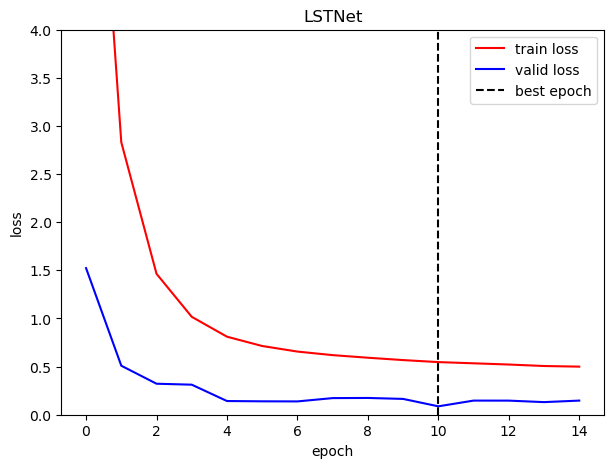

In [9]:
grid_model.plot_losses(plot_title='LSTNet', save_filename='LSNet_losses.png')